# 보스턴 주택 가격 회귀분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

### 데이터 준비

In [2]:
# boston 데이터셋 로드
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [3]:
# boston 데이터셋을 DataFrame으로 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
print(bostonDF)         #  [506 rows x 13 columns]

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [4]:
# 데이터프레임을 boston.csv 파일로 저장하기
bostonDF.to_csv('boston.csv', encoding='utf-8')

In [5]:
# boston 데이터셋의 target 열(컬럼)은 주택 가격임.
# boston.target을 PRICE 컬럼으로 추가함
bostonDF['PRICE'] = boston.target                  # 'PRICE' 컬럼 추가
print('Boston 데이터셋 크기:', bostonDF.shape)     # Boston 데이터셋 크기: (506, 14)
print(bostonDF.head())                             # 앞에서 5개의 데이터 출력

Boston 데이터셋 크기: (506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


## 시각화
#### 다음의 각 컬럼 RM, ZN, INDUS, NOX, AGE, PTRATIO, LSTAT, RAD 의 총 8개의 컬럼에 대해서값이 증가할수록 PRICE에 어떤 영향을 미치는지 분석하고 시각화를 해보자

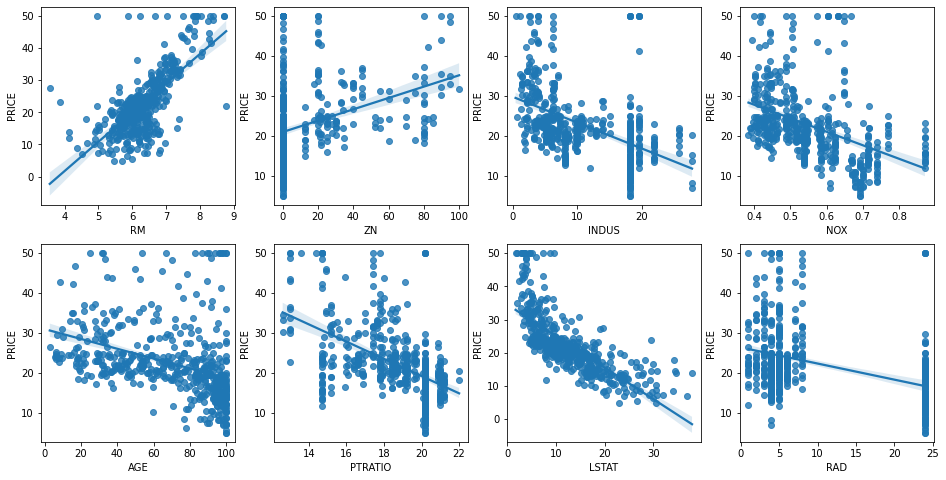

In [6]:
# 시본(searborn)의 regplot을 이용해 산점도와 선형 회귀선을 출력
# 2개의 행과 4개의 열을 가진 subplots 로 시각화, axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature , y='PRICE', data=bostonDF , ax=axs[row][col])
plt.show()

# RM(방개수)와 LSTAT(하위 계층의 비율)이 PRICE에 영향도가 가장 두드러지게 나타남.
# 1. RM(방개수)은 양 방향의 선형성(Positive Linearity)이 가장 크다.
#    방의 크기가 클수록 가격이 증가하는 모습을 확연히 보여준다.
# 2. LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 크다.
#    하위 계층의 비율이 낮을수록 PRICE 가 증가하는 모습을 확연히 보여준다.

### LinearRegression 모델을 이용해서 보스턴 주택 가격을 예측해보자

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# 'PRICE' 컬럼값을 y_target에 할당
# 데이터프레임에서 'PRICE' 컬럼 삭제한 나머지 데이터를 반환
y_target = bostonDF['PRICE']                                
x_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)    

In [9]:
# train_test_split()을 이용해 학습과 테스트 데이터셋을 분리해서 학습과 예측을 수행한다.
# train data 와 test data로 분할(7:3 비율)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, 
                                                    test_size=0.3,
                                                    random_state=156)

In [10]:
# 선형회귀 모델생성
model = LinearRegression() 

In [11]:
# 모델학습 
model.fit(x_train, y_train)

LinearRegression()

In [12]:
# 모델예측 
y_preds = model.predict(x_test)  

In [13]:
# 회기 모델의 성능 평가 
# 결정 계수 : r2_score()
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))  

Variance score : 0.757


In [14]:
# LinearRegression 으로 생성한 주택가격 모델의 회귀계수(coefficients)와 절편(intercept)을 구해보자
# 회귀계수는 LinearRegression 객체의 coef_ 속성으로 구할수 있고,
# 절편은 LinearRegression 객체의 intercept_ 속성으로 구할수 있다.
print('회귀계수값:', np.round(model.coef_, 1))       # 소수 첫째자리
print('절편값:', model.intercept_)

회귀계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]
절편값: 40.995595172164336


In [15]:
# 회귀계수를 큰 값 순으로 정렬하기 위해서 Series로 생성함.
coff = pd.Series(data=np.round(model.coef_, 1), index=x_data.columns)
print(coff.sort_values(ascending=False))      # 회귀계수를 기준으로 내림차순 정렬

# RM(방의 갯수)이 양의 회귀계수 중에서 가장 큰값이다.
# NOX(일산화 질소 농도)가 음의 회귀계수 중에서 가장 큰값이다.

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64
